In [2]:
import matplotlib.pyplot as plt
from solution import split_dataset, ErrorRate, random_projections
import numpy as np
from tqdm import tqdm as tqdm

In [3]:
banknote =  np.genfromtxt("data_banknote_authentication.txt", delimiter=",")

# Q-5

In [4]:
h_values = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 3.0, 10.0, 20.0]
sigma_values = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 3.0, 10.0, 20.0]

train, val, test = split_dataset(banknote)
train_x, train_y = train[:, :4], train[:, 4]
val_x, val_y = val[:, :4], val[:, 4]
test_x, test_y = test[:,:4], test[:, 4]

error_rate = ErrorRate(train_x, train_y, val_x, val_y)

hard_parzen_errors = list(map(error_rate.hard_parzen, h_values))
soft_parzen_errors = list(map(error_rate.soft_parzen, sigma_values))

In [5]:
print("Validation error\n")
print("Hard parzen: {}, Min: {}, Max: {}\n".format(np.round(hard_parzen_errors,3), 
                                                   min(np.round(hard_parzen_errors,3)), max(np.round(hard_parzen_errors,3))))
print("Soft parzen: {}, Min: {},   Max: {}".format(np.round(soft_parzen_errors,3),
                                                 min(np.round(soft_parzen_errors,3)), max(np.round(soft_parzen_errors,3))))

Validation error

Hard parzen: [0.507 0.504 0.482 0.412 0.299 0.219 0.026 0.015 0.263 0.361], Min: 0.015, Max: 0.507

Soft parzen: [0.219 0.    0.    0.    0.    0.    0.007 0.018 0.318 0.423], Min: 0.0,   Max: 0.423


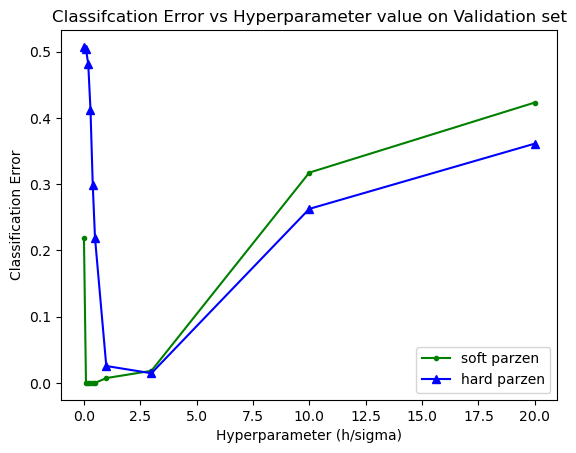

In [6]:
plt.plot(sigma_values, soft_parzen_errors, color="green", label="soft parzen",marker=".")
plt.plot(h_values, hard_parzen_errors, color="blue", label="hard parzen", marker="^")
plt.legend(loc="lower right")
plt.xlabel("Hyperparameter (h/sigma)")
plt.ylabel("Classification Error")
plt.title("Classifcation Error vs Hyperparameter value on Validation set")
plt.show()

**Observations**
1. Soft window Parzen method achieves **zero classification error** on the validation set for multiple values of hyper parameter $\sigma$. Comparatively, the lowest error achieved in hard window method is 0.015. Soft parzen method thus leads to better generalisation in the validation set. 
2. For both methods, increasing the window size (either via *h* or $\sigma$) beyond a certain value(> 0.5) leads to a monotonic increase in error rate. This implies that including the vote of far-off data points leads to noisy classification. 

# Q-7

**Time complexity analysis** : Big O notation
Let n= no of training samples, d = dimension of input feature, c =  no of classes

**Hard Parzen** 
Training:  O(1)
Testing = O(nd + n + n) = O(nd+n)
* O(nd) --> Distance calculation between training set and test point
* O(n) --> Distance < h
* O(n) --> Argmax(labels)

No effect of time complexity on the choice of radius "h" since a single pass over the dataset has to be made anyway regardless of its value.

**Soft Parzen**
Training: O(1)
Testing: O(nd + nc + n + n) = O(nd+nc+n)
* O(nd) --> Kernel calculation between training set and test point
* O(nc) --> Kernel mulitplication with one hot labels
* O(n) --> Sum kernel weights
* O(n) --> armgax(labels)

No effect on time complexity, since all points are considered in calculation of kernel regardless of value of $\sigma$. 

# Q-9

In [7]:
np.random.seed(seed=1997)
projection_encoding_matrix = np.random.normal(size=(500, 4, 2))
train_set = np.repeat(train_x[None, :, :], repeats=500, axis=0)
val_set = np.repeat(val_x[None, :, :], repeats=500, axis=0)

projection_map_train = random_projections(train_set, projection_encoding_matrix)
projection_map_val = random_projections(val_set, projection_encoding_matrix)

error_hard_parzen = []
error_soft_parzen = []
for i in tqdm(range(500)):
    error_rate = ErrorRate(projection_map_train[i], train_y, 
                           projection_map_val[i], val_y)
    
    hard_parzen_errors = list(map(error_rate.hard_parzen, h_values))
    soft_parzen_errors = list(map(error_rate.soft_parzen, sigma_values))
    
    error_hard_parzen.append(hard_parzen_errors)
    error_soft_parzen.append(soft_parzen_errors)

error_hard_parzen = np.array(error_hard_parzen)
error_soft_parzen = np.array(error_soft_parzen)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [09:21<00:00,  1.12s/it]


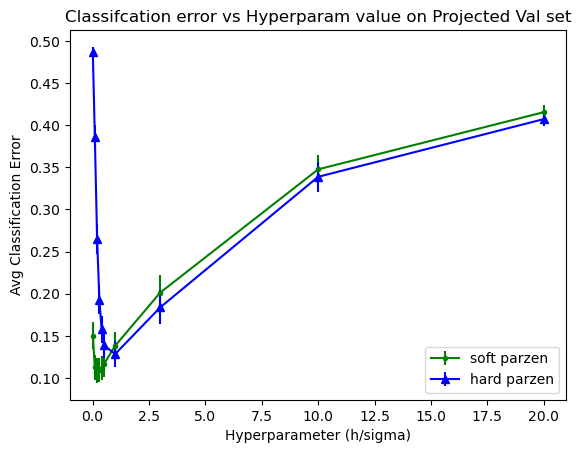

In [8]:
mean_error_hard_parzen = np.mean(error_hard_parzen, axis=0)
mean_error_soft_parzen = np.mean(error_soft_parzen, axis=0)

std_error_hard_parzen = 0.2*np.std(error_hard_parzen, axis=0)
std_error_soft_parzen = 0.2*np.std(error_soft_parzen, axis=0)

plt.errorbar(sigma_values, mean_error_soft_parzen, yerr=std_error_soft_parzen, color="green",label="soft parzen",marker=".")
plt.errorbar(h_values, mean_error_hard_parzen, yerr=std_error_hard_parzen, color="blue", label="hard parzen", marker="^")
plt.xlabel("Hyperparameter (h/sigma)")
plt.ylabel("Avg Classification Error")
plt.title("Classifcation error vs Hyperparam value on Projected Val set")
plt.legend(loc="lower right")
plt.show()

In [9]:
print("Validation error with projection\n")
print("Hard parzen: {}, Min: {}, Max: {}\n".format(np.round(mean_error_hard_parzen,3), 
                                                   min(np.round(mean_error_hard_parzen,3)), max(np.round(mean_error_hard_parzen,3))))
print("Soft parzen: {}, Min: {},   Max: {}".format(np.round(mean_error_soft_parzen,3),
                                                 min(np.round(mean_error_soft_parzen,3)), max(np.round(mean_error_soft_parzen,3))))

Validation error with projection

Hard parzen: [0.487 0.386 0.265 0.193 0.158 0.139 0.128 0.184 0.339 0.407], Min: 0.128, Max: 0.487

Soft parzen: [0.15  0.113 0.109 0.109 0.112 0.116 0.138 0.201 0.348 0.415], Min: 0.109,   Max: 0.415


**Observations:**
1. Soft parzen is still the better method compared to hard parzen in terms of lower classification error. 
2. Compared to previous, there is a consistent increase in error rate for both methods across all hyperparameter values. Soft parzen method no longer achieves zero classification error on the validation set after projection operation on the input features. 
3. The increase in error rate implies there is information loss in due to decrease in dimension of input features after projection. 